<a href="https://colab.research.google.com/github/Yoki-28/Deep-Learning-Model-for-Intrusion-Detection-System-in-Health-Care-IOT/blob/main/S8_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary modules



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from keras.optimizers import SGD

Import dataset

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/02-14-2018.csv")
df

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,80,6,14/02/2018 10:53:23,10156986,5,5,1089,1923,587,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048571,80,6,14/02/2018 10:53:33,117,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048572,80,6,14/02/2018 10:53:28,5095331,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048573,80,6,14/02/2018 10:53:28,5235511,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [6]:
print(df.head())
print(df['Label'].value_counts())

   Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0         0         0  14/02/2018 08:31:01      112641719             3   
1         0         0  14/02/2018 08:33:50      112641466             3   
2         0         0  14/02/2018 08:36:39      112638623             3   
3        22         6  14/02/2018 08:40:13        6453966            15   
4        22         6  14/02/2018 08:40:23        8804066            14   

   Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0             0                0                0                0   
1             0                0                0                0   
2             0                0                0                0   
3            10             1239             2273              744   
4            11             1143             2209              744   

   Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0                0  ...                 0          0.0    

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

Data Cleaning

In [8]:
cols = df.columns
cols = cols.map(lambda x: x.replace(' ', '_') )
df.columns = cols
print(df.head())

   Dst_Port  Protocol            Timestamp  Flow_Duration  Tot_Fwd_Pkts  \
0         0         0  14/02/2018 08:31:01      112641719             3   
1         0         0  14/02/2018 08:33:50      112641466             3   
2         0         0  14/02/2018 08:36:39      112638623             3   
3        22         6  14/02/2018 08:40:13        6453966            15   
4        22         6  14/02/2018 08:40:23        8804066            14   

   Tot_Bwd_Pkts  TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  \
0             0                0                0                0   
1             0                0                0                0   
2             0                0                0                0   
3            10             1239             2273              744   
4            11             1143             2209              744   

   Fwd_Pkt_Len_Min  ...  Fwd_Seg_Size_Min  Active_Mean  Active_Std  \
0                0  ...                 0          0.0    

Checking for null and INFINITE

In [9]:
#replace infinit number
df=df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
#drop null
df.dropna(how = 'all')

,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,80,6,14/02/2018 10:53:23,10156986,5,5,1089,1923,587,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048571,80,6,14/02/2018 10:53:33,117,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048572,80,6,14/02/2018 10:53:28,5095331,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048573,80,6,14/02/2018 10:53:28,5235511,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


Checking Data type


In [10]:
print('Data type of each column of Dataframe :')
df.info(verbose=True)

Data type of each column of Dataframe :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 78 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst_Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow_Duration      1048575 non-null  int64  
 4   Tot_Fwd_Pkts       1048575 non-null  int64  
 5   Tot_Bwd_Pkts       1048575 non-null  int64  
 6   TotLen_Fwd_Pkts    1048575 non-null  int64  
 7   TotLen_Bwd_Pkts    1048575 non-null  int64  
 8   Fwd_Pkt_Len_Max    1048575 non-null  int64  
 9   Fwd_Pkt_Len_Min    1048575 non-null  int64  
 10  Fwd_Pkt_Len_Mean   1048575 non-null  float64
 11  Fwd_Pkt_Len_Std    1048575 non-null  float64
 12  Bwd_Pkt_Len_Max    1048575 non-null  int64  
 13  Bwd_Pkt_Len_Min    1048575 non-null  int64  
 14  Bwd_Pkt_Len_Mean   1048575 non-null  float

Drop all column contain object datatype exept Label


In [11]:
df = df.drop(columns=['Timestamp'])
print('Timestamp', "column is dropped")

Timestamp column is dropped


Modify Label column

In [12]:
print(df['Label'].value_counts())

Label
Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: count, dtype: int64


In [13]:
df.Label[df.Label=='Benign'] = 0
df.Label[df.Label =='FTP-BruteForce'] = 1
df.Label[df.Label =='SSH-Bruteforce'] = 1
df["Label"].astype('Int64')
print(df['Label'].value_counts())

<ipython-input-13-4131b89b068f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Label[df.Label=='Benign'] = 0
<ipython-input-13-4131b89b068f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Label[df.Label =='FTP-BruteForce'] = 1
<ipython-input-13-4131b89b068f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Label[df.Label =='SSH-Bruteforce'] = 1


Label
0    667626
1    380949
Name: count, dtype: int64


Reduce Bening rows

In [14]:
# Count the number of rows in each class
ddos_count = df[df['Label'] == 1].shape[0]
benign_count = df[df['Label'] == 0].shape[0]

# Randomly sample the benign rows to reduce their count
df_benign = df[df['Label'] == 0].sample(n=ddos_count, random_state=42)

# Combine the DDoS and sampled benign rows into a new dataframe
df_reduced = pd.concat([df[df['Label'] == 1], df_benign])

# Shuffle the rows in the new dataframe
df_reduced = df_reduced.sample(frac=1, random_state=42)

df = df_reduced
df["Label"].astype('float')
print(df['Label'].value_counts())

Label
0    380949
1    380949
Name: count, dtype: int64


Date Analysis


In [15]:
bening_df = df[df['Label']==0]
malignant_df = df[df['Label']==1]

<Axes: xlabel='Flow_Duration', ylabel='Tot_Fwd_Pkts'>

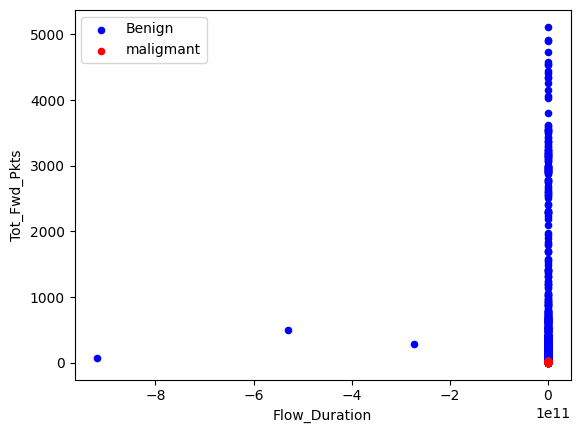

In [16]:
axes = bening_df.plot(kind='scatter', x='Flow_Duration', y = 'Tot_Fwd_Pkts', color='blue', label='Benign')
malignant_df.plot(kind='scatter', x='Flow_Duration', y = 'Tot_Fwd_Pkts', color='red', label='maligmant', ax=axes)

Converting categorical variables to integers


In [17]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print(cat_cols)

cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

print('Data type of each column of Dataframe :')
df.info(verbose=True)

Index(['Label'], dtype='object')
Index(['Label'], dtype='object')
Data type of each column of Dataframe :
<class 'pandas.core.frame.DataFrame'>
Index: 761898 entries, 539090 to 122078
Data columns (total 77 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Dst_Port           761898 non-null  int64  
 1   Protocol           761898 non-null  int64  
 2   Flow_Duration      761898 non-null  int64  
 3   Tot_Fwd_Pkts       761898 non-null  int64  
 4   Tot_Bwd_Pkts       761898 non-null  int64  
 5   TotLen_Fwd_Pkts    761898 non-null  int64  
 6   TotLen_Bwd_Pkts    761898 non-null  int64  
 7   Fwd_Pkt_Len_Max    761898 non-null  int64  
 8   Fwd_Pkt_Len_Min    761898 non-null  int64  
 9   Fwd_Pkt_Len_Mean   761898 non-null  float64
 10  Fwd_Pkt_Len_Std    761898 non-null  float64
 11  Bwd_Pkt_Len_Max    761898 non-null  int64  
 12  Bwd_Pkt_Len_Min    761898 non-null  int64  
 13  Bwd_Pkt_Len_Mean   761898 non-null  float64

Creating Traning and Testing arrays


Creating train_df dataset


In [18]:
# Shuffle the rows
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Select a subset of the data for training
num_data = 15000 # can change between 500 and 1152382
train_df = df.iloc[:num_data].copy() # Use .iloc to avoid a SettingWithCopyWarning

print('Data type of each column of Dataframe :')
train_df.info(verbose=True)

Data type of each column of Dataframe :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 77 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dst_Port           15000 non-null  int64  
 1   Protocol           15000 non-null  int64  
 2   Flow_Duration      15000 non-null  int64  
 3   Tot_Fwd_Pkts       15000 non-null  int64  
 4   Tot_Bwd_Pkts       15000 non-null  int64  
 5   TotLen_Fwd_Pkts    15000 non-null  int64  
 6   TotLen_Bwd_Pkts    15000 non-null  int64  
 7   Fwd_Pkt_Len_Max    15000 non-null  int64  
 8   Fwd_Pkt_Len_Min    15000 non-null  int64  
 9   Fwd_Pkt_Len_Mean   15000 non-null  float64
 10  Fwd_Pkt_Len_Std    15000 non-null  float64
 11  Bwd_Pkt_Len_Max    15000 non-null  int64  
 12  Bwd_Pkt_Len_Min    15000 non-null  int64  
 13  Bwd_Pkt_Len_Mean   15000 non-null  float64
 14  Bwd_Pkt_Len_Std    15000 non-null  float64
 15  Flow_IAT_Mean      15000 non-n

Split dataset


In [19]:
train_size = int(0.7 * len(train_df))
val_size = int(0.15 * len(train_df))
test_size = len(train_df) - train_size - val_size
train_data = train_df.iloc[:train_size, :]
val_data = train_df.iloc[train_size:train_size+val_size, :]
test_data = train_df.iloc[train_size+val_size:, :]

Generate sequences


In [20]:
# Define sequence length and overlap
seq_length = 10 # Sequence length
seq_overlap = 5 # Overlap between sequences

# Function to generate sequences
def generate_sequences(data):
    seqs = []
    for i in range(0, len(data) - seq_length + 1, seq_overlap):
        seqs.append(data.iloc[i:i+seq_length, :])
    return seqs

# Generate sequences for train, validation, and test sets
train_seqs = generate_sequences(train_data)
val_seqs = generate_sequences(val_data)
test_seqs = generate_sequences(test_data)

pad sequences


In [21]:
# Function to pad sequences
def pad_sequences(seqs):
    padded_seqs = []
    for seq in seqs:
        if len(seq) < seq_length:
            padded_seq = np.concatenate((seq, np.zeros((seq_length-len(seq), len(df.columns)))), axis=0)
        else:
            padded_seq = seq
        padded_seqs.append(padded_seq)
    return np.array(padded_seqs)

# Pad sequences for train, validation, and test sets
train_seqs = pad_sequences(train_seqs)
val_seqs = pad_sequences(val_seqs)
test_seqs = pad_sequences(test_seqs)

Reshape input


In [22]:
print(train_df.values)

[[21 6 2 ... 0 0 1]
 [8158 6 86279115 ... 86279115 86279115 0]
 [22 6 4 ... 0 0 1]
 ...
 [21 6 1 ... 0 0 1]
 [21 6 18 ... 0 0 1]
 [80 6 119985824 ... 10010151 9607952 0]]


In [23]:
# Reshape input
train_X = np.reshape(train_seqs, (train_seqs.shape[0], train_seqs.shape[1], len(train_df.columns)))
val_X = np.reshape(val_seqs, (val_seqs.shape[0], val_seqs.shape[1], len(train_df.columns)))
test_X = np.reshape(test_seqs, (test_seqs.shape[0], test_seqs.shape[1], len(train_df.columns)))

Normalize data


In [24]:
# Normalize data
train_X = (train_X - train_X.mean()) / train_X.std()
val_X = (val_X - train_X.mean()) / train_X.std()
test_X = (test_X - train_X.mean()) / train_X.std()

Convert labels to categorical


In [25]:
# Convert labels to categorical
train_y = to_categorical(train_data["Label"].values[:train_X.shape[0]])
val_y = to_categorical(val_data["Label"].values[:val_X.shape[0]])
test_y = to_categorical(test_data["Label"].values[:test_X.shape[0]])

In [26]:
train_X = train_X.astype('float32')
train_y = train_y.astype('float32')
val_X = val_X.astype('float32')
val_y = val_y.astype('float32')

Long Short Term Memory (LSTM)


In [27]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from keras.optimizers import SGD

In [28]:
seq_length = 10 # set the sequence length
n_features = len(df.columns) # number of features in the dataset

# Define model architecture
from keras.layers import Activation

# Define model architecture with ReLU activation function
model = Sequential()
model.add(LSTM(units=64, input_shape=(seq_length, n_features), return_sequences=True))
model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.2))

model.add(Activation('relu'))
model.add(Dense(units=2, activation='softmax'))








# Compile model with SGD optimizer
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(train_X.shape, train_y.shape, val_X.shape, val_y.shape)
model.summary()

(2099, 10, 77) (2099, 2) (449, 10, 77) (449, 2)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            36352     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 48834 (190.76 KB)
Trainable params: 48834 (190.76 KB)
Non-trainable params: 0 (0.00 Byte)
____________________________________

In [29]:
# Train model
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
history = model.fit(train_X, train_y, epochs=100, batch_size=16, validation_split=0.1, callbacks=[early_stop])
history

Epoch 1/100
119/119 [==============================] - 11s 43ms/step - loss: 0.6981 - accuracy: 0.4913 - val_loss: 0.6917 - val_accuracy: 0.5524
Epoch 2/100
119/119 [==============================] - 1s 8ms/step - loss: 0.6951 - accuracy: 0.5124 - val_loss: 0.6895 - val_accuracy: 0.5857
Epoch 3/100
119/119 [==============================] - 1s 7ms/step - loss: 0.6941 - accuracy: 0.4997 - val_loss: 0.6976 - val_accuracy: 0.5095
Epoch 4/100
119/119 [==============================] - 1s 7ms/step - loss: 0.6931 - accuracy: 0.5151 - val_loss: 0.7001 - val_accuracy: 0.4762
Epoch 5/100
119/119 [==============================] - 1s 7ms/step - loss: 0.6942 - accuracy: 0.5003 - val_loss: 0.6940 - val_accuracy: 0.5810
Epoch 6/100
119/119 [==============================] - 1s 7ms/step - loss: 0.6918 - accuracy: 0.5278 - val_loss: 0.6958 - val_accuracy: 0.5571
Epoch 7/100
119/119 [==============================] - 1s 7ms/step - loss: 0.6920 - accuracy: 0.5029 - val_loss: 0.7002 - val_accuracy: 0.44

Results

LOSS Chart


<function matplotlib.pyplot.show(close=None, block=None)>

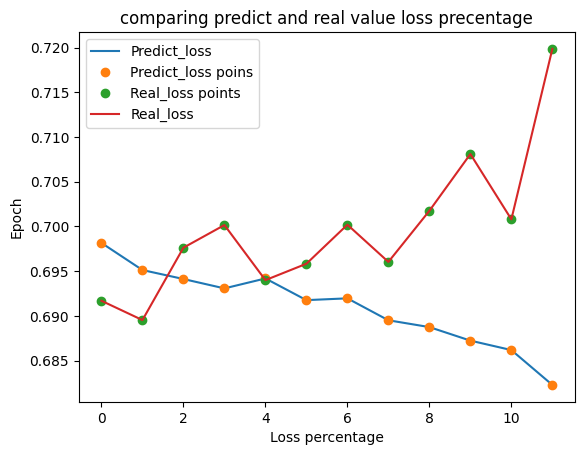

In [30]:
#loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['loss'], 'o')
plt.plot(history.history['val_loss'], 'o')
plt.plot(history.history['val_loss'])
plt.title('comparing predict and real value loss precentage')
plt.xlabel('Loss percentage')
plt.ylabel('Epoch')
plt.legend(['Predict_loss','Predict_loss poins','Real_loss points', 'Real_loss'])
plt.show

Accuracy


<function matplotlib.pyplot.show(close=None, block=None)>

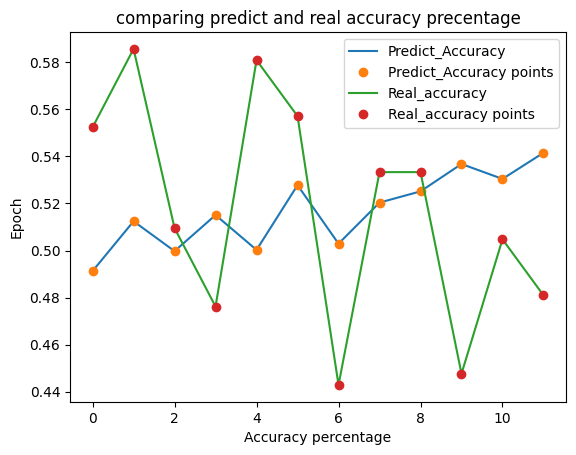

In [31]:
#accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['accuracy'],'o')
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_accuracy'],'o')
plt.title('comparing predict and real accuracy precentage')
plt.xlabel('Accuracy percentage')
plt.ylabel('Epoch')
plt.legend(['Predict_Accuracy','Predict_Accuracy points', 'Real_accuracy','Real_accuracy points'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

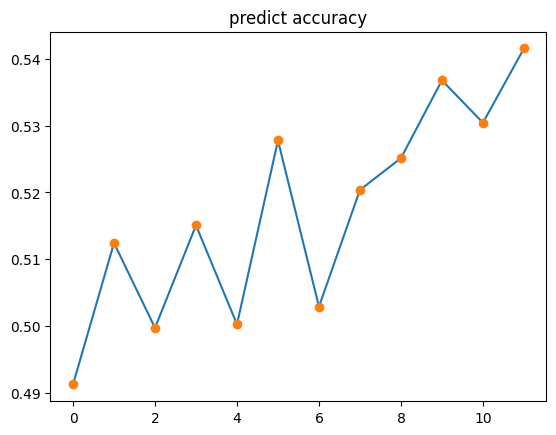

In [32]:
#accuracy Plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['accuracy'],'o')
plt.title('predict accuracy')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

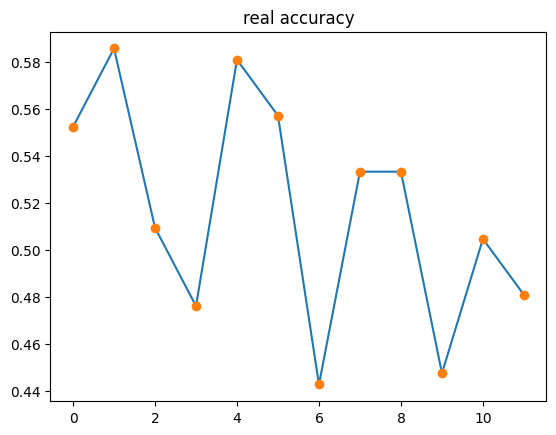

In [33]:
#val_accuracy Plot
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_accuracy'],'o')
plt.title('real accuracy')
plt.show